In [1]:
from urllib.request import urlretrieve
import matplotlib.pyplot as plt 
import pandas as pd
import dateparser
%matplotlib inline

In [2]:
parse_date = lambda x: dateparser.parse(x, date_formats=['%B%Y'], languages=['es'])

In [3]:
update_data = False
if update_data:
    url = 'http://www.spensiones.cl/estadisticas/series_afp/pensionados/numero_monto_promedio_pensiones_pagadas.xls'
    urlretrieve(url, "numero_monto_promedio_pensiones_pagadas.xls")

In [4]:
df = pd.read_excel("numero_monto_promedio_pensiones_pagadas.xls", skiprows=1, index_col='FECHA')

In [5]:
Totales = ['TOTAL RETIROS  PROGRAMADOS', 'TOTAL RENTAS TEMPORALES', 
           'TOTAL CUBIERTAS POR EL SEGURO', 'TOTAL RENTAS VITALICIAS PAGADAS', 
           'TOTAL RENTAS VITALICIAS INMEDIATAS', 'TOTAL RENTAS VITALICIAS DIFERIDAS', 
           'TOTAL RENTAS VITALICIAS ']

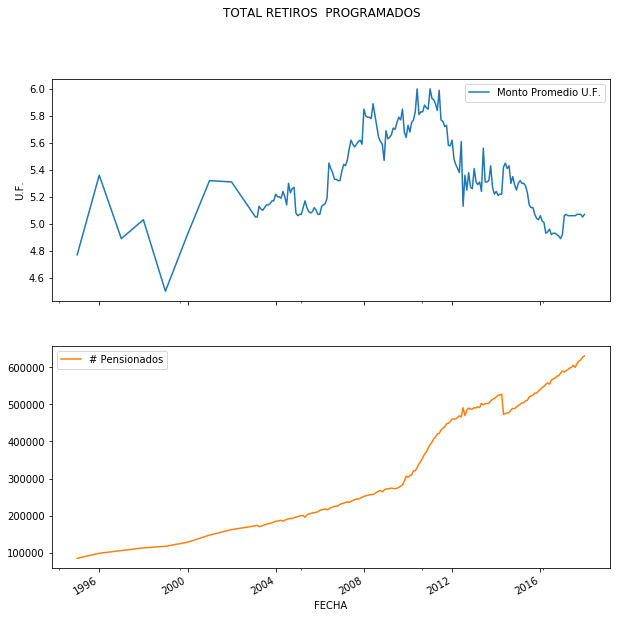

****************************************************************************************************


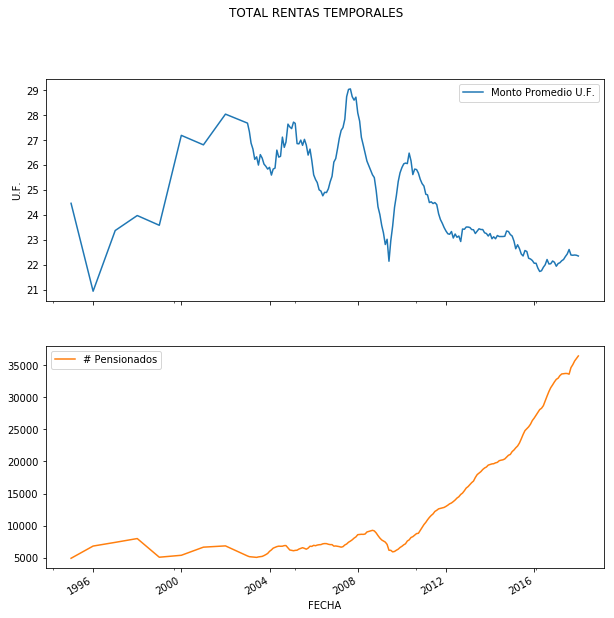

****************************************************************************************************


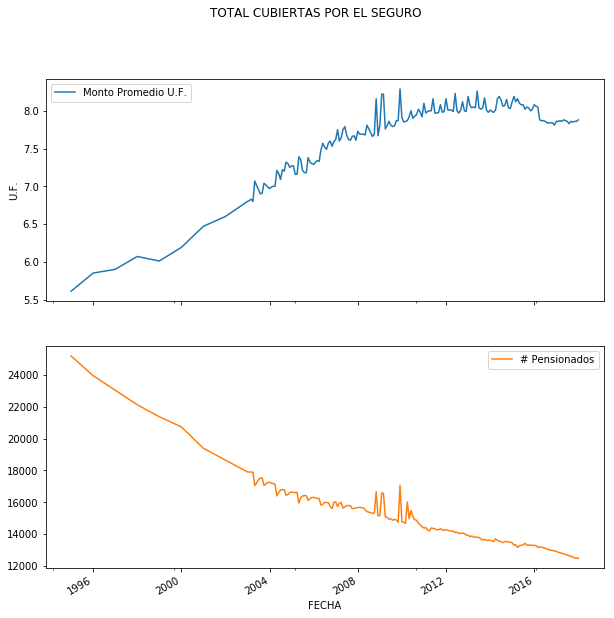

****************************************************************************************************


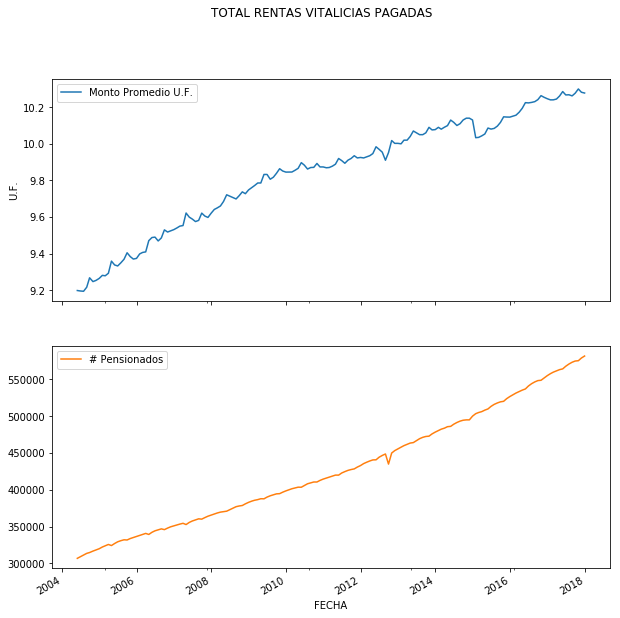

****************************************************************************************************


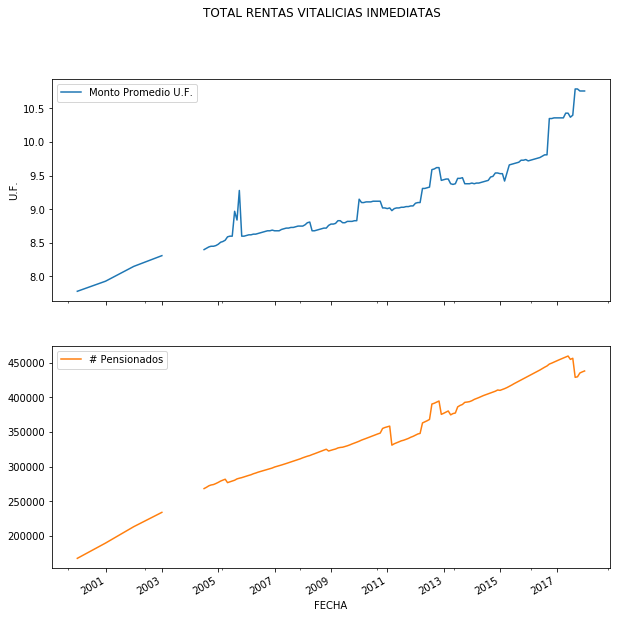

****************************************************************************************************


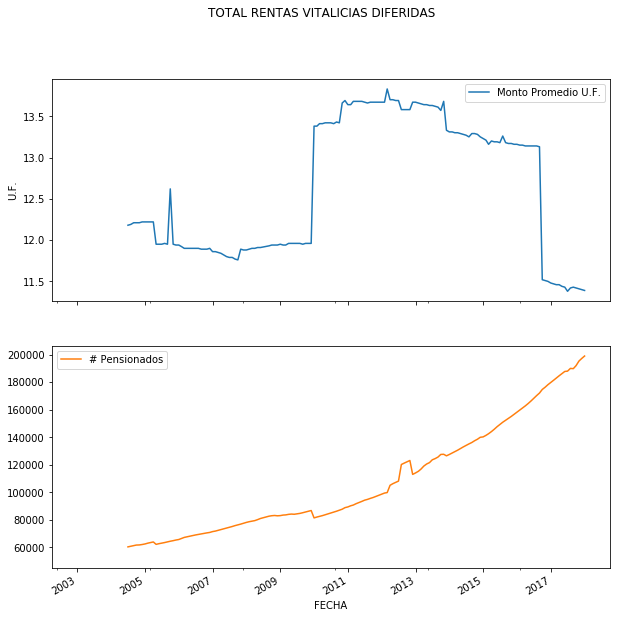

****************************************************************************************************


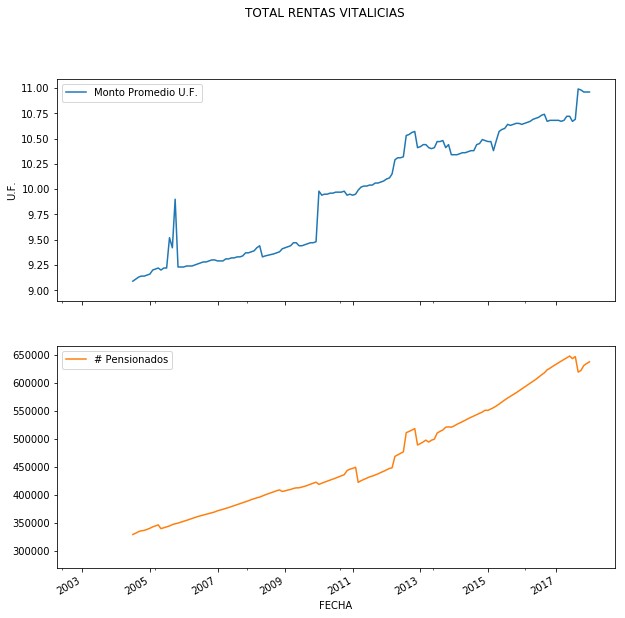

****************************************************************************************************


In [6]:
for modalidad in Totales:
    m = pd.pivot_table(df, index=['AFP', 'Sexo', 'FECHA'], columns='Número y Monto Promedio U.F.', values=modalidad)
    m = m.loc['SISTEMA','Total']
    m.index = m.index.map(parse_date)
    m.rename(columns={'Monto':'Monto Promedio U.F.', 'Número': '# Pensionados'}, inplace=True)
    axes = m.plot(subplots=True, figsize=(10,10), title=modalidad)
    axes[0].set_ylabel('U.F.')
    plt.show()
    print('*'*100)

In [7]:
from IPython.display import YouTubeVideo

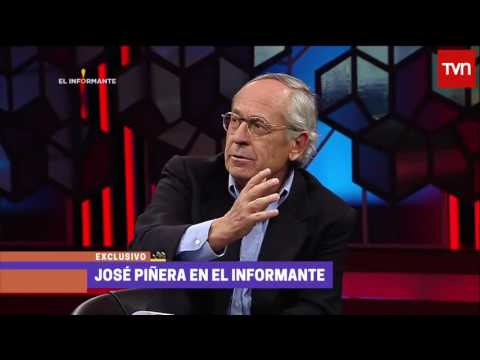

In [8]:
YouTubeVideo('J-gD_B_hIxE', start=9*60+50)

### Preguntas:
* ¿Cuántos pensionados son HOMBRES que han cotizado por 30 años o más en la AFP Habitat? 
* ¿Es representativo ese grupo de individuos en comparación con el promedio del SISTEMA?

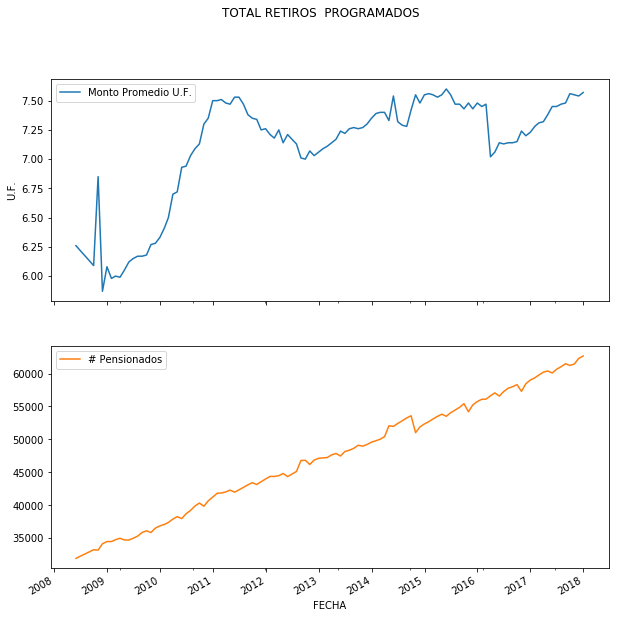

****************************************************************************************************


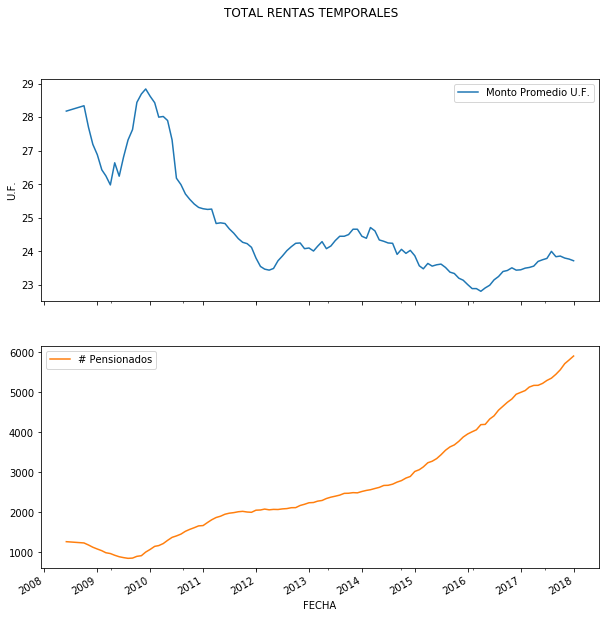

****************************************************************************************************


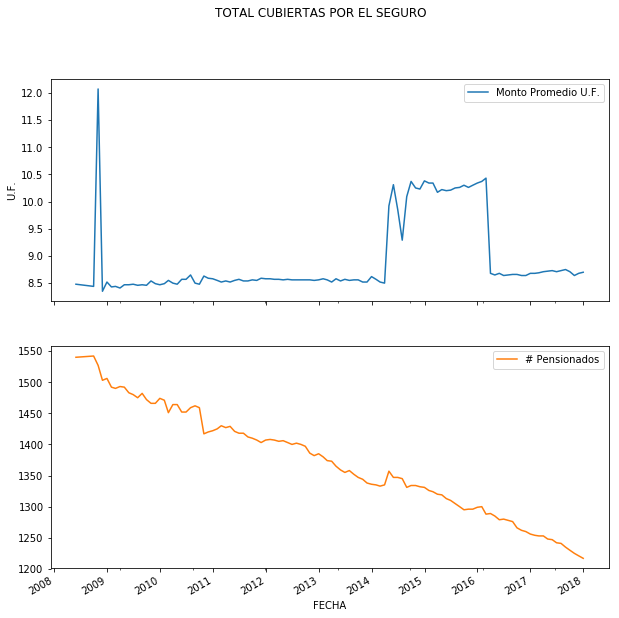

****************************************************************************************************


In [9]:
for modalidad in Totales:
    m = pd.pivot_table(df, index=['AFP', 'Sexo', 'FECHA'], columns='Número y Monto Promedio U.F.', values=modalidad)
    m = m.loc['Habitat','Masculino']
    m.index = m.index.map(parse_date)
    m.rename(columns={'Monto':'Monto Promedio U.F.', 'Número': '# Pensionados'}, inplace=True)
    if not m.dropna().size:
        continue
    axes = m.plot(subplots=True, figsize=(10,10), title=modalidad)
    axes[0].set_ylabel('U.F.')
    plt.show()
    print('*'*100)

## Respuestas:
* Ni siquiera la pensión promedio superior a 650 mil pesos de la carta, es representativa de la pensión promedio de TODOS los HOMBRES pensionados en la AFP Habitat, lo más que se acerca son 24 UF de la Rentas Temporales de aproximandamente 6 mil pensionados.

In [14]:
karg_csv = dict(delimiter=';', decimal=',', index_col=0, parse_dates=True)
url = 'https://raw.githubusercontent.com/collabmarket/data_bcentral/master/data/uf.csv'
uf = pd.read_csv(url, **karg_csv)
uf = uf.resample('M').last()

In [15]:
m = pd.pivot_table(df, index=['AFP', 'Sexo', 'FECHA'], 
               columns='Número y Monto Promedio U.F.', 
               values='TOTAL RENTAS TEMPORALES').loc['Habitat','Masculino']
m.index = m.index.map(parse_date)

In [16]:
rt_pesos = m.Monto * uf.Valor

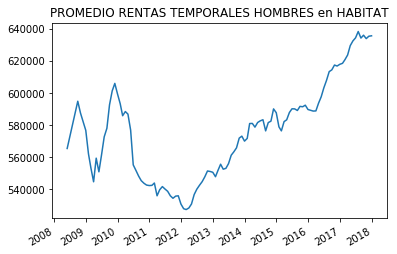

In [17]:
rt_pesos.dropna().plot(title='PROMEDIO RENTAS TEMPORALES HOMBRES en HABITAT')